# @author Nishant Rathore

## Tickets.csv

## Main goal: How efficient is our customer support?
### Subgoal 1: How timely efficient are each team and its members in resolving customer issues and providing maximum satisfaction? 
### Subgoal 2: How productively efficient do each team assign its resources in resolving customer issues and providing maximum satisfaction?  


## Importing all the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import ipywidgets as widgets
from ipywidgets import interact
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import circlify
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import matplotlib.ticker
from datetime import datetime,timedelta
import numpy
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [2]:
df = pd.read_csv('tickets.csv', parse_dates=['creation_date', 'view_date','action_date'],infer_datetime_format = True)


## Target subgoal 1

## A facet plot that shows the relationship between the average number of total minutes each team and has taken and the customer rating they received. 

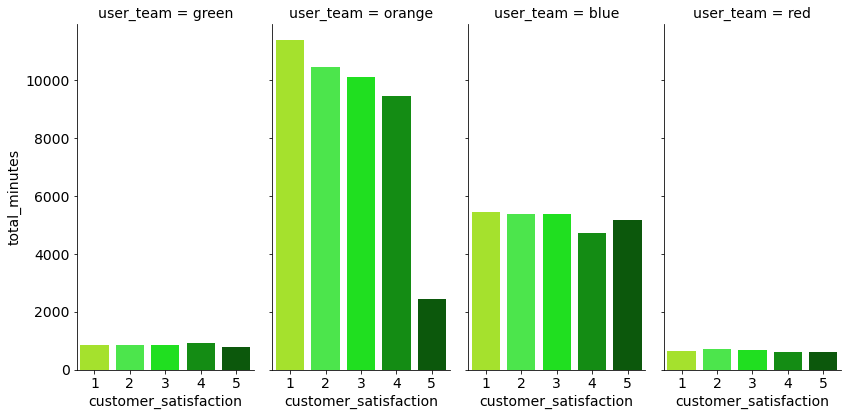

In [3]:
df['creation_view'] = df['view_date'] - df['creation_date']
df['view_action'] = df['action_date'] - df['view_date']

df['creation_view'] = df['creation_view'].dt.total_seconds().div(60).astype(int)
df['view_action'] = df['view_action'].dt.total_seconds().div(60).astype(int)


dfSorted = df[['creation_view','view_action','user_actioned','user_team','customer_satisfaction']].groupby(['user_actioned','user_team','customer_satisfaction']).mean().sort_values(by='user_actioned').reset_index()
dfSorted['total_minutes'] = dfSorted['creation_view'] + dfSorted['view_action']


colors = ["#AFFF0F", "#32FF32", "#00FF00", "#00A000", "#006400"]

plt.rc('font', size=14) 
g = sns.FacetGrid(dfSorted, col="user_team", height=6, aspect=0.5, palette=sns.color_palette(colors),hue='customer_satisfaction')
g.map(sns.barplot, "customer_satisfaction", "total_minutes",order=dfSorted['customer_satisfaction'].unique(), ci=None)
plt.tight_layout()
plt.savefig("facet.pdf", format="pdf")

## Target subgoal 2

## A square plot that shows how many tickets each team has assigned to its team members. It shows how productive each team or its users have been in helping the customers

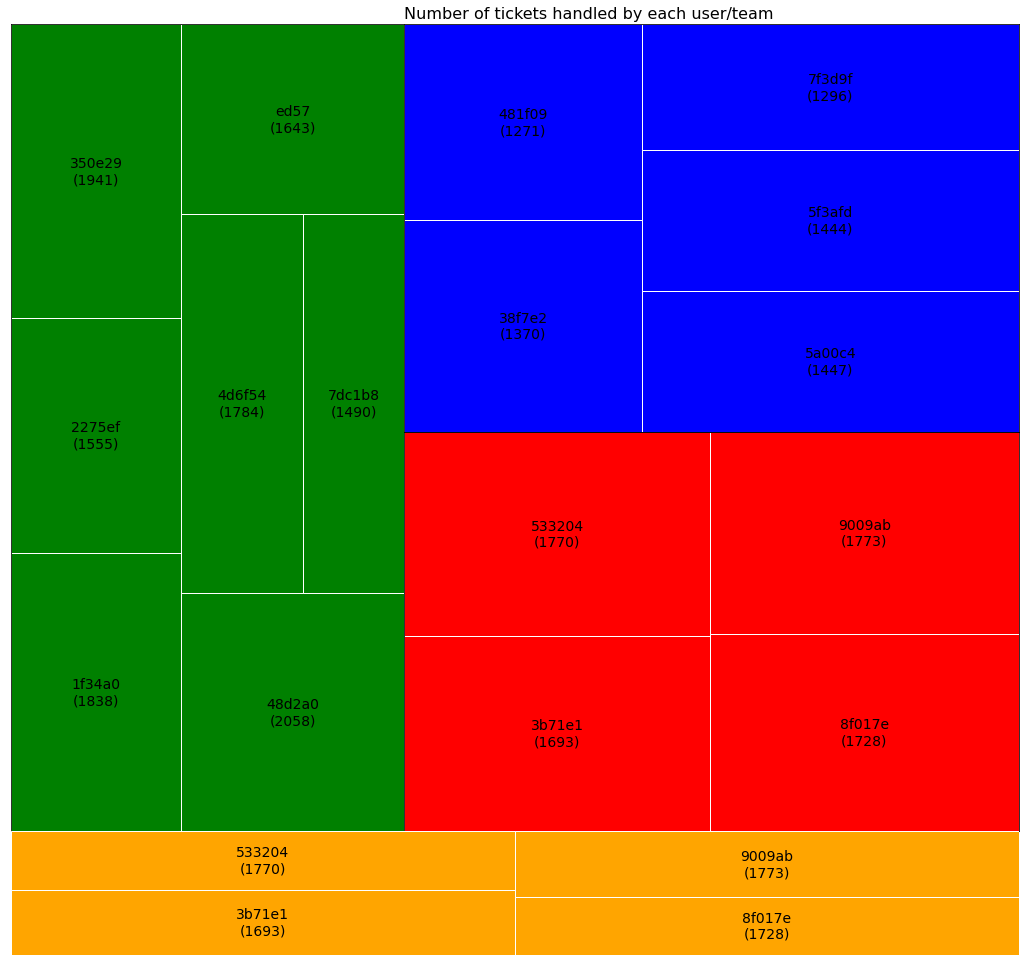

In [4]:
fig,ax0 = plt.subplots(figsize=(14,10))


ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)

sum =  df['user_team'].count()
orangeSum = df[df['user_team']=='orange']['user_team'].count()
blueSum = df[df['user_team']=='blue']['user_team'].count()
redSum = df[df['user_team']=='red']['user_team'].count()
greenSum = df[df['user_team']=='green']['user_team'].count()


blueOverGreen = blueSum/greenSum
redOverGreen = redSum/greenSum


ax = fig.add_axes([0,orangeSum/sum, greenSum/sum, blueOverGreen+redOverGreen])
ax3 = fig.add_axes([greenSum/sum, orangeSum/sum, 1-greenSum/sum,blueOverGreen])
ax2 = fig.add_axes([greenSum/sum, orangeSum/sum+blueOverGreen, 1-greenSum/sum, redOverGreen])
ax4 = fig.add_axes([0, 0, 1, orangeSum/sum])

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

def concatenateName(x):
    return (x['user_actioned'] + "\n({}".format(x['user_team'])+")")


# caclulate the sum for the area of each square
greenUserGrouped = df[df['user_team']=='green'].groupby('user_actioned').count().reset_index()
greenUserGrouped["label"] = greenUserGrouped.apply(lambda x: concatenateName(x), axis=1)
greenUserSum = squarify.normalize_sizes(greenUserGrouped.user_team,7,7)
redUserGrouped = df[df['user_team']=='red'].groupby('user_actioned').count().reset_index()
redUserGrouped["label"] = redUserGrouped.apply(lambda x: concatenateName(x), axis=1)
redUserSum = squarify.normalize_sizes(redUserGrouped.user_team,7,7)
blueUserGrouped = df[df['user_team']=='blue'].groupby('user_actioned').count().reset_index()
blueUserGrouped["label"] = blueUserGrouped.apply(lambda x: concatenateName(x), axis=1)
blueUserSum = squarify.normalize_sizes(blueUserGrouped.user_team,7,7)
orangeUserGrouped = df[df['user_team']=='orange'].groupby('user_actioned').count().reset_index()
orangeUserGrouped["label"] = orangeUserGrouped.apply(lambda x: concatenateName(x), axis=1)
orangeUserSum = squarify.normalize_sizes(orangeUserGrouped.user_team,7,7)

# plot each axis

ax = squarify.plot(greenUserSum,color='green', ax=ax, pad=False,
    edgecolor="white",label=greenUserGrouped['label'])

ax2 = squarify.plot(blueUserSum,color='blue', ax=ax2, pad=False,
    edgecolor="white",label=blueUserGrouped['label'])

ax3 = squarify.plot(redUserSum,color='red', ax=ax3, pad=False,
    edgecolor="white",label=redUserGrouped['label'])

ax4 = squarify.plot(orangeUserSum,color='orange', ax=ax4, pad=False,
    edgecolor="white",label=redUserGrouped['label'])    

ax2.set_title('Number of tickets handled by each user/team',loc='left',size=16)
plt.axis('off')
plt.rc('font', size=20) 
fig.tight_layout()
fig.savefig("square.pdf", format="pdf")
plt.show()


## Target subgoal 2

## A circlify plot that shows how many and what type of tickets each team has assigned to its team members. It shows how productive each team or its users have been in helping the customers. 

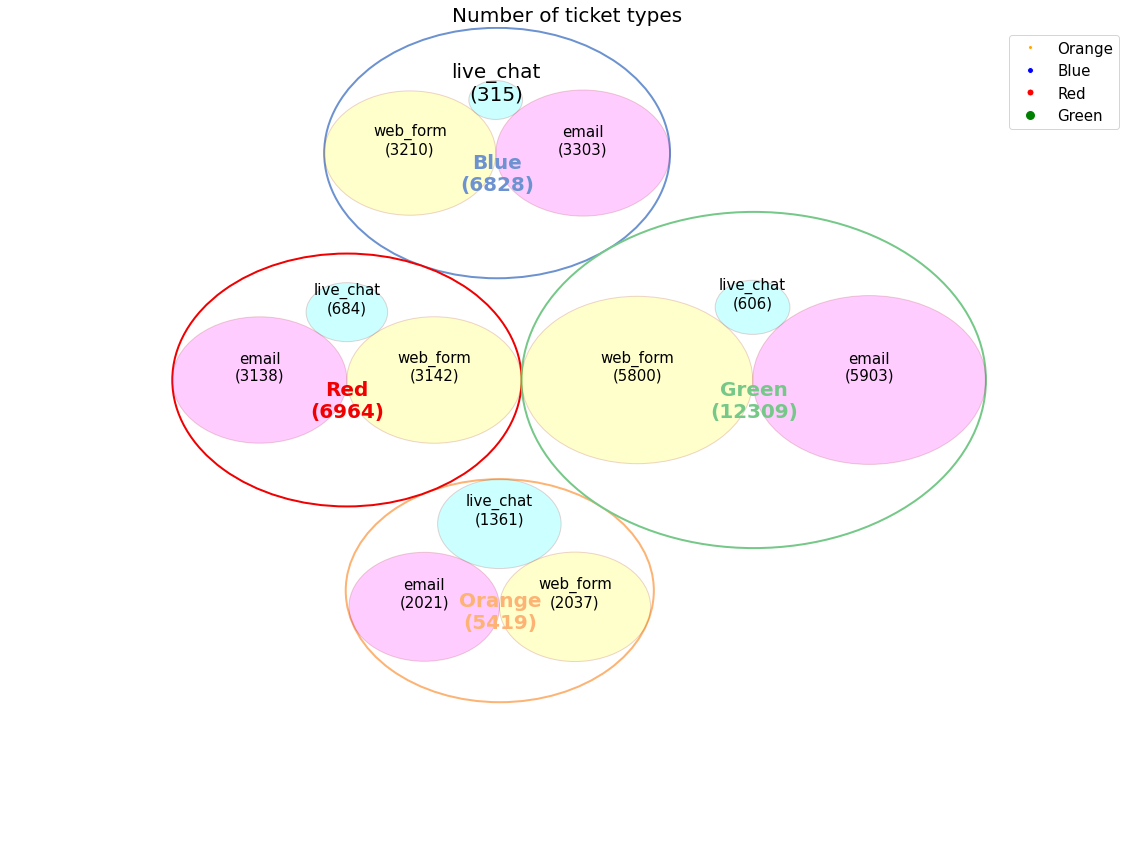

In [5]:

df2 = df
color = '';
def applyColor(x):
    if x["ticket_type"] == 'live_chat':
        color = "cyan"
    elif x["ticket_type"] == 'email':
        color = "magenta"
    elif x["ticket_type"] == 'web_form':
        color = "yellow" 
    return color 

df2["Color"] = df2.apply(lambda x: applyColor(x), axis=1)


liveChatSum = df2[df2['ticket_type']=='live_chat']['user_team'].count()
emailSum = df2[df2['ticket_type']=='email']['user_team'].count()
webFormSum = df2[df2['ticket_type']=='web_form']['user_team'].count()


blueChildren = []
greenChildren = []
redChildren = []
orangeChildren = []

for str2 in ['blue','green','orange','red']:
  for ticketType in ['live_chat','email','web_form']:
    currCount = df2[(df2['ticket_type'] == ticketType) & (df2['user_team'] == str2)]['user_team'].count()
    dict1 = {'id':ticketType+"\n("+"{}".format(currCount)+")",'datum':currCount,'color':df2[df2['ticket_type'] == ticketType]['Color'].unique()[0]}
    if (str2 == 'blue'):
      blueChildren.append(dict1)
    elif (str2 == 'green'):
        greenChildren.append(dict1)
    elif (str2 == 'orange'):
        orangeChildren.append(dict1)
    else:
      redChildren.append(dict1)


data = [{'id': 'User Teams', 'datum': sum, 'children' : [
              {'id' : "Blue\n("+"{}".format(blueSum)+")", 'datum': blueSum, 'color':'#6C92D0', 'children' : blueChildren
              },
              {'id' : "Green\n("+"{}".format(greenSum)+")", 'datum' : greenSum, 'color':'#75C888', 'children' : greenChildren
              },       
              {'id' : "Orange\n("+"{}".format(orangeSum)+")", 'datum' : orangeSum, 'color':'#FDB373', 'children' : orangeChildren
              },
              {'id' : "Red\n("+"{}".format(redSum)+")", 'datum' : redSum, 'color':'#F00000', 'children' : redChildren
              }
    ]}]

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(16,12))
plt.rc('font', size=20) 
# Title
ax.set_title('Number of ticket types',loc='center',size=20)

# Remove axes
ax.axis('off')

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=-1, y=2, r=10)
)

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
    
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (team):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex['id']
    plt.annotate(label, (x,y ), va='top', alpha = 1.0, ha='center',color=circle.ex['color'],size=20,weight='bold')
    ax.add_patch( plt.Circle((x, y), r, alpha=1.0, linewidth=2 ,facecolor='white',edgecolor=circle.ex['color']))

# Print circle and labels for the highest ticket type:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex['id']
    plt.annotate(label, (x,y ), ha='center', color="black")
    ax.add_patch( plt.Circle((x, y), r, alpha=0.2, facecolor=circle.ex['color'],edgecolor='brown'))
    plt.rc('font', size=15) 
    
line1 = Line2D(range(1), range(1), color="white", marker='o', markersize=4, markerfacecolor="orange")
line2 = Line2D(range(1), range(1), color="white", marker='o',markersize=6, markerfacecolor="blue")
line3 = Line2D(range(1), range(1), color="white", marker='o',markersize=7, markerfacecolor="red")
line4 = Line2D(range(1), range(1), color="white", marker='o',markersize=10,markerfacecolor="green")
plt.legend((line1,line2,line3,line4),('Orange', 'Blue', 'Red', 'Green'),numpoints=1, loc=1)
plt.tight_layout()
plt.savefig("circle.pdf", format="pdf")

## Target subgoal 1&2

## A heat map that shows how successful each team and its members in resolving customer issues across different ticket types. It also highlights the distinction between the two occurences: when the customer problem was resolved; and when the customer problem wasn't resolved

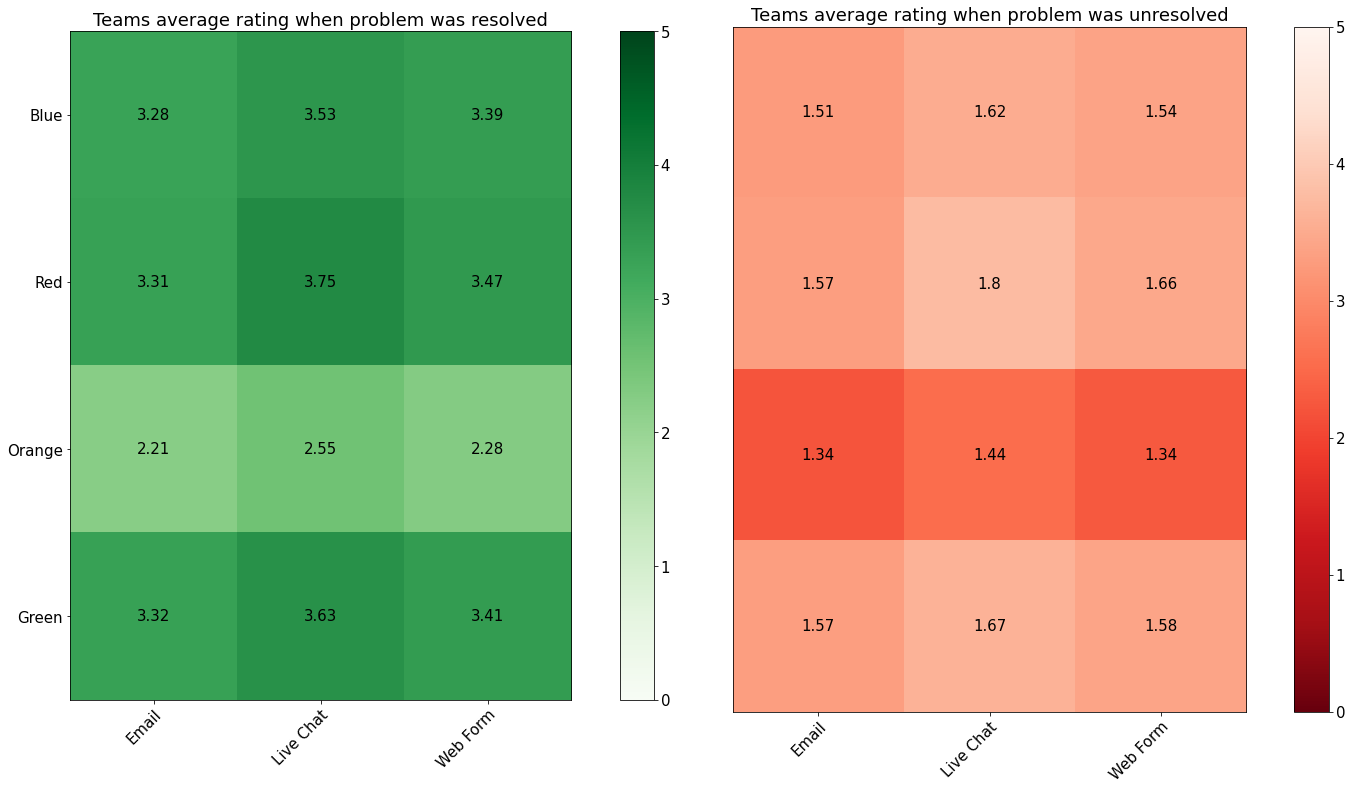

In [6]:

df['actionWeek'] = df['action_date'].dt.isocalendar().week 
dfGrouped = df.groupby(['user_team','actionWeek','customer_problem_resolved','customer_satisfaction','ticket_type']).count().reset_index()
dfGrouped = df[df.customer_problem_resolved == True]
dfGroupedBlue = dfGrouped[dfGrouped['user_team'] == 'blue'].groupby('ticket_type').mean().reset_index()
dfGroupedRed = dfGrouped[dfGrouped['user_team'] == 'red'].groupby('ticket_type').mean().reset_index()
dfGroupedOrange = dfGrouped[dfGrouped['user_team'] == 'orange'].groupby('ticket_type').mean().reset_index()
dfGroupedGreen = dfGrouped[dfGrouped['user_team'] == 'green'].groupby('ticket_type').mean().reset_index()


customerSatisfaction = np.array([dfGroupedBlue.customer_satisfaction.round(2),
                    dfGroupedRed.customer_satisfaction.round(2),
                    dfGroupedOrange.customer_satisfaction.round(2),
                    dfGroupedGreen.customer_satisfaction.round(2)])

# plot the first heat map on the left
fig, ax = plt.subplots(figsize=(14,11))
im = ax.imshow(customerSatisfaction, cmap='Greens',vmin=0 ,vmax=5.0)
plt.colorbar(im);

for i in range(4):
    for j in range(3):
        text = ax.text(j, i, customerSatisfaction[i, j],
                       ha="center", va="center")

# plot the second heat map on the right
ax2 = fig.add_axes([0.7, 0.095, 0.95, 0.865])
ax2.get_yaxis().set_visible(False)
im = ax2.imshow(customerSatisfaction, cmap='Reds_r',vmin=0 ,vmax=5)
plt.colorbar(im);

dfGrouped = df.groupby(['user_team','actionWeek','customer_problem_resolved','customer_satisfaction','ticket_type']).mean().reset_index()
dfGrouped = df[df.customer_problem_resolved == False]
dfGroupedBlue = dfGrouped[dfGrouped['user_team'] == 'blue'].groupby('ticket_type').mean().reset_index()
dfGroupedRed = dfGrouped[dfGrouped['user_team'] == 'red'].groupby('ticket_type').mean().reset_index()
dfGroupedOrange = dfGrouped[dfGrouped['user_team'] == 'orange'].groupby('ticket_type').mean().reset_index()
dfGroupedGreen = dfGrouped[dfGrouped['user_team'] == 'green'].groupby('ticket_type').mean().reset_index()


customerSatisfaction = np.array([dfGroupedBlue.customer_satisfaction.round(2),
                    dfGroupedRed.customer_satisfaction.round(2),
                    dfGroupedOrange.customer_satisfaction.round(2),
                    dfGroupedGreen.customer_satisfaction.round(2)])

plt.rc('font', size=15) 

for i in range(4):
    for j in range(3):
        text = ax2.text(j, i, customerSatisfaction[i, j],
                       ha="center", va="center")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Email','Live Chat','Web Form'])
ax.set_yticks(np.arange(4))
ax.set_yticklabels(['Blue','Red','Orange','Green'])

ax2.set_xticks(np.arange(3))
ax2.set_xticklabels(['Email','Live Chat','Web Form'])
ax2.set_yticks(np.arange(4))
ax2.set_yticklabels(['Blue','Red','Orange','Green'])


# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")


# Set axes title
ax.set_title("Teams average rating when problem was resolved")
ax2.set_title("Teams average rating when problem was unresolved")
plt.tight_layout()
plt.savefig("heatmap.pdf", format="pdf")
plt.show()



## Target subgoal 1

## Violin plots that show the distribution of total minutes taken by each user of different teams. The dropdopwn allows you to select different time intervals: creation to viewing of a ticket, viewing to actioning of a ticket, and creation to actioning of a ticket

In [7]:
teams=['red','orange','green','blue']
times=['total_minutes','creation_view','view_action']
dfGrouped = df
selectedTeam = 'orange'
plt.rc('font', size=15) 

def teamFunc(team):
    dfGrouped = df
    global selectedTeam 
    dfGrouped['total_minutes'] = dfGrouped['creation_view'] + dfGrouped['view_action']
    selectedTeam = team
    interact(generateGraph, time=widgets.Dropdown(options=times))

# Draw graph once we have the inputs selected
def generateGraph(time):
    fig,(ax) = plt.subplots(1,1,figsize=(18,7))
    dfGrouped = df[df['user_team'] == selectedTeam]
    pall = selectedTeam.capitalize()+"s"
    ax = sns.violinplot(x=df[time],y=dfGrouped.user_actioned,orient='h',inner="quartile",scale='width',palette=pall)
    sns.rugplot(data=dfGrouped, x=time,ax=ax)
    if(time != 'view_action'):
      ax.set_xticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000])
      ax.set_xticklabels(['0','10K','20K','30K','40K','50K','60K','70K','80K','90K'])
    if(time == 'view_action'):
        ax.set_xlabel('Time taken since tickets viewing to actioned (in mins)');
    elif(time == 'creation_view'):
        ax.set_xlabel('Time taken since tickets creation to viewing (in mins)');
    else:
        ax.set_xlabel('Time taken since tickets creation to actioned (in mins)');
    ax.set_ylabel('User actioned')
    fig.tight_layout()
    fig.savefig("violinRedTotalMins.png", format="png")

# create the first interact element
interact(teamFunc,team = widgets.Dropdown(options=teams))




interactive(children=(Dropdown(description='team', options=('red', 'orange', 'green', 'blue'), value='red'), O…

<function __main__.teamFunc(team)>

## Target subgoal 1

## A timeline plot that shows how much each team deviates from the average of the total minutes taken by them per week. It shows on average the worst performing team and the best performing team if the average number of total minutes per week were considered a baseline. 

In [8]:

@interact(variance = ['Minimum','Maximum'])
def genGraph(variance):
    df['week'] = df['action_date'].dt.isocalendar().week

    # Create function to calculate Start Week date
    week_start_date = lambda date: date - timedelta(days=date.weekday())

    # Apply above function on DataFrame column
    df['week_start_date'] = df['action_date'].apply(week_start_date)
    df['week_start_date'] = df['week_start_date'].dt.strftime('%Y-%m-%d')
    dfGrouped2 = df.groupby(['week','user_team','week_start_date']).mean().reset_index().sort_values(by='week')
    dfGrouped2['totalMinVariance'] = 0
    dfGrouped2['totalMinVarianceAbs'] = 0

    retArray = []
    def applyVariance(x,meanPerWeek):
        x['totalMinVariance'] = x['total_minutes'] - meanPerWeek
        retArray.append(x['totalMinVariance'])

    # looping through to calculate the variance
    for k in dfGrouped2['week'].unique():
        meanPerWeek = dfGrouped2[dfGrouped2['week'] == k].total_minutes.mean()
        ret = dfGrouped2[dfGrouped2['week'] == k].apply(lambda x: applyVariance(x,meanPerWeek),axis=1)

        
    dfGrouped2['totalMinVariance'] = retArray
    dfGrouped2['totalMinVarianceAbs'] = dfGrouped2['totalMinVariance'].abs()


    # Set the type of variance based on the user selection
    for j in dfGrouped2['week'].unique():
        if(variance == 'Maximum'):
            maxV = dfGrouped2[dfGrouped2['week'] == j].totalMinVarianceAbs.max()
        else:
            maxV = dfGrouped2[dfGrouped2['week'] == j].totalMinVarianceAbs.min()
        dfTemp = dfGrouped2[dfGrouped2['week'] == j].groupby(level=0,group_keys=False).apply(lambda x: x.loc[x['totalMinVarianceAbs']==maxV])
        dfGrouped2[dfGrouped2['week'] == j] = dfTemp
    
    dfGrouped2 = dfGrouped2.dropna()

    dates = numpy.array(dfGrouped2['week'].unique())
    names = dfGrouped2.totalMinVariance

    plt.rc('xtick', labelsize=12) 
    plt.rc('ytick', labelsize=12) 
    plt.rc('axes', titlesize=12) 

    # Choose some nice levels
    levels = []

    for i in dates:
        #print(dfGrouped2[dfGrouped2['week']==i].totalMinVariance.values[0])
        levels.append(dfGrouped2[dfGrouped2['week']==i]['totalMinVariance'].values[0])


    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(12, 10), constrained_layout=True)
    if(variance == 'Maximum'):
        ax.set(title="Max variance of total minutes to process a ticket by week")
    else:
        ax.set(title="Min variance of total minutes to process a ticket by week")

    vlines = ax.vlines(dates, 0, levels, colors=dfGrouped2.user_team)  # The vertical stems.
    ax.plot(dates, np.zeros_like(dates), "-o",
            color="k", markerfacecolor="w")  # Baseline and markers on it.

    lines = []
    
    # annotate lines
    for d, l, r, c in zip(dates, levels, names,dfGrouped2.user_team):
        ax.annotate(int(r), xy=(d, l),
                    xytext=(-3, np.sign(l)*3), textcoords="offset points",
                    horizontalalignment="left",
                    verticalalignment="bottom" if l > 0 else "top")
        lines.append(Line2D([0, 0.5], [0,0.5], color=c))
    # format xaxis with 4 month intervals

    tickLabels = []
    legendLabels = []
    for i in dates:
        tickLabels.append("Week "+str(int(i)))
        legendLabels.append(str(int(i)))


    # Set the axes and the labels
    ax.set_xlim(dfGrouped2['week'].min() - 1, dfGrouped2['week'].max() + 1)
    ax.set_xticklabels(tickLabels)
    dfGrouped2['WeekString'] = legendLabels
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
    # remove y axis and spines
    dfGrouped2['legendFormat'] = dfGrouped2['WeekString'] + " : " + dfGrouped2['week_start_date']
    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)
    ax.legend(lines, dfGrouped2.legendFormat,loc='upper left',title = "Week Start Date")
    ax.margins(y=0.1)
    plt.show()

    fig.tight_layout()
    fig.savefig("timelineMin.png", format="png")



interactive(children=(Dropdown(description='variance', options=('Minimum', 'Maximum'), value='Minimum'), Outpu…

##### 